In [30]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

In [31]:
do_data_url = 'https://bsrvp.github.io/data/DOData.csv'  
nut_average_url = 'https://bsrvp.github.io/data/NutAverage.xlsx'  
pytho_biomass_url = 'https://bsrvp.github.io/data/PythoBiomass.xlsx'  

### Q1) Read the data file NutAverage.xlsx into a DataFrame and perform the following tasks:

In [32]:
df = pd.read_excel(nut_average_url) 
df.head()

,Day Count,NH4-N,NO2-N,NO3-N,TN
0,1,6.915879,2.885372,7.457832,35.834969
1,47,6.344965,2.852123,5.696753,36.359106
2,78,4.964745,2.090747,2.167375,40.719987
3,116,4.361492,2.301630,1.653266,24.931194
4,143,3.980372,1.419541,0.233538,36.234797


#### Find the null values, if any, in the data set and fill the null values with the method of your choice.

In [33]:
print("Null values in the dataset:")  
print(df.isnull().sum())

Null values in the dataset:
Day Count    0
NH4-N        0
NO2-N        0
NO3-N        0
TN           0
dtype: int64


In [34]:
df.fillna(df.mean(), inplace=True)
df

,Day Count,NH4-N,NO2-N,NO3-N,TN
0,1,6.915879,2.885372,7.457832,35.834969
1,47,6.344965,2.852123,5.696753,36.359106
2,78,4.964745,2.090747,2.167375,40.719987
3,116,4.361492,2.301630,1.653266,24.931194
4,143,3.980372,1.419541,0.233538,36.234797
5,181,4.814007,1.416273,0.185584,36.269086
6,210,5.774826,2.250251,1.034297,27.557018
7,236,4.439287,1.977844,0.482635,45.557639
8,270,2.394753,2.289396,1.439277,28.102278
9,298,1.956891,1.685278,0.831846,30.017141


### Add a column DIN (stands for Dissolved Inorganic Nitrogen) to this DataFrame, where DIN = NH4-N N +NO2- N +NO3-N.

In [35]:
df['DIN'] = df['NH4-N'] + df['NO2-N'] + df['NO3-N']
df

,Day Count,NH4-N,NO2-N,NO3-N,TN,DIN
0,1,6.915879,2.885372,7.457832,35.834969,17.259083
1,47,6.344965,2.852123,5.696753,36.359106,14.893841
2,78,4.964745,2.090747,2.167375,40.719987,9.222866
3,116,4.361492,2.301630,1.653266,24.931194,8.316388
4,143,3.980372,1.419541,0.233538,36.234797,5.633451
5,181,4.814007,1.416273,0.185584,36.269086,6.415864
6,210,5.774826,2.250251,1.034297,27.557018,9.059374
7,236,4.439287,1.977844,0.482635,45.557639,6.899766
8,270,2.394753,2.289396,1.439277,28.102278,6.123425
9,298,1.956891,1.685278,0.831846,30.017141,4.474016


### Add another column DON (Dissolved Organic Nitrogen) to this DataFrame, where DON = TN - DIN.

In [36]:
df['DON'] = df['TN'] - df['DIN']
df

,Day Count,NH4-N,NO2-N,NO3-N,TN,DIN,DON
0,1,6.915879,2.885372,7.457832,35.834969,17.259083,18.575886
1,47,6.344965,2.852123,5.696753,36.359106,14.893841,21.465266
2,78,4.964745,2.090747,2.167375,40.719987,9.222866,31.497121
3,116,4.361492,2.301630,1.653266,24.931194,8.316388,16.614806
4,143,3.980372,1.419541,0.233538,36.234797,5.633451,30.601346
5,181,4.814007,1.416273,0.185584,36.269086,6.415864,29.853222
6,210,5.774826,2.250251,1.034297,27.557018,9.059374,18.497643
7,236,4.439287,1.977844,0.482635,45.557639,6.899766,38.657873
8,270,2.394753,2.289396,1.439277,28.102278,6.123425,21.978853
9,298,1.956891,1.685278,0.831846,30.017141,4.474016,25.543126


### Add a row named Averages which contains the averages of each of NH4-N, NO2-N, NO3-N, TN, DIN, 
DON.

In [37]:
averages = df[['NH4-N', 'NO2-N', 'NO3-N', 'TN', 'DIN', 'DON']].mean()  
averages_df = averages.to_frame().T   
averages_df.index = ['Averages']  
df = pd.concat([df, averages_df])
df

,Day Count,NH4-N,NO2-N,NO3-N,TN,DIN,DON
0,1.0,6.915879,2.885372,7.457832,35.834969,17.259083,18.575886
1,47.0,6.344965,2.852123,5.696753,36.359106,14.893841,21.465266
2,78.0,4.964745,2.090747,2.167375,40.719987,9.222866,31.497121
3,116.0,4.361492,2.301630,1.653266,24.931194,8.316388,16.614806
4,143.0,3.980372,1.419541,0.233538,36.234797,5.633451,30.601346
5,181.0,4.814007,1.416273,0.185584,36.269086,6.415864,29.853222
6,210.0,5.774826,2.250251,1.034297,27.557018,9.059374,18.497643
7,236.0,4.439287,1.977844,0.482635,45.557639,6.899766,38.657873
8,270.0,2.394753,2.289396,1.439277,28.102278,6.123425,21.978853
9,298.0,1.956891,1.685278,0.831846,30.017141,4.474016,25.543126


### Describe characteristics of the DataFrame.

In [38]:
df.describe()

,Day Count,NH4-N,NO2-N,NO3-N,TN,DIN,DON
count,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,189.666667,4.536201,2.150382,2.038842,34.513920,8.725425,25.788496
std,115.797106,1.373646,0.453143,2.144153,5.956099,3.596171,6.530319
min,1.000000,1.956891,1.416273,0.185584,24.931194,4.474016,16.614806
25%,106.500000,3.980372,1.977844,0.831846,30.017141,6.415864,21.465266
50%,195.500000,4.521629,2.250251,1.613106,35.834969,8.316388,25.543126
75%,277.000000,4.964745,2.305632,2.038842,36.359106,9.059374,30.601346
max,364.000000,6.915879,2.885372,7.457832,45.557639,17.259083,38.657873


### Plot all the data (except the Day Count column) using the area plot, line plot and box plot of DataFrame.
(use Subplots where ever appropriate for better visualisation of the data)

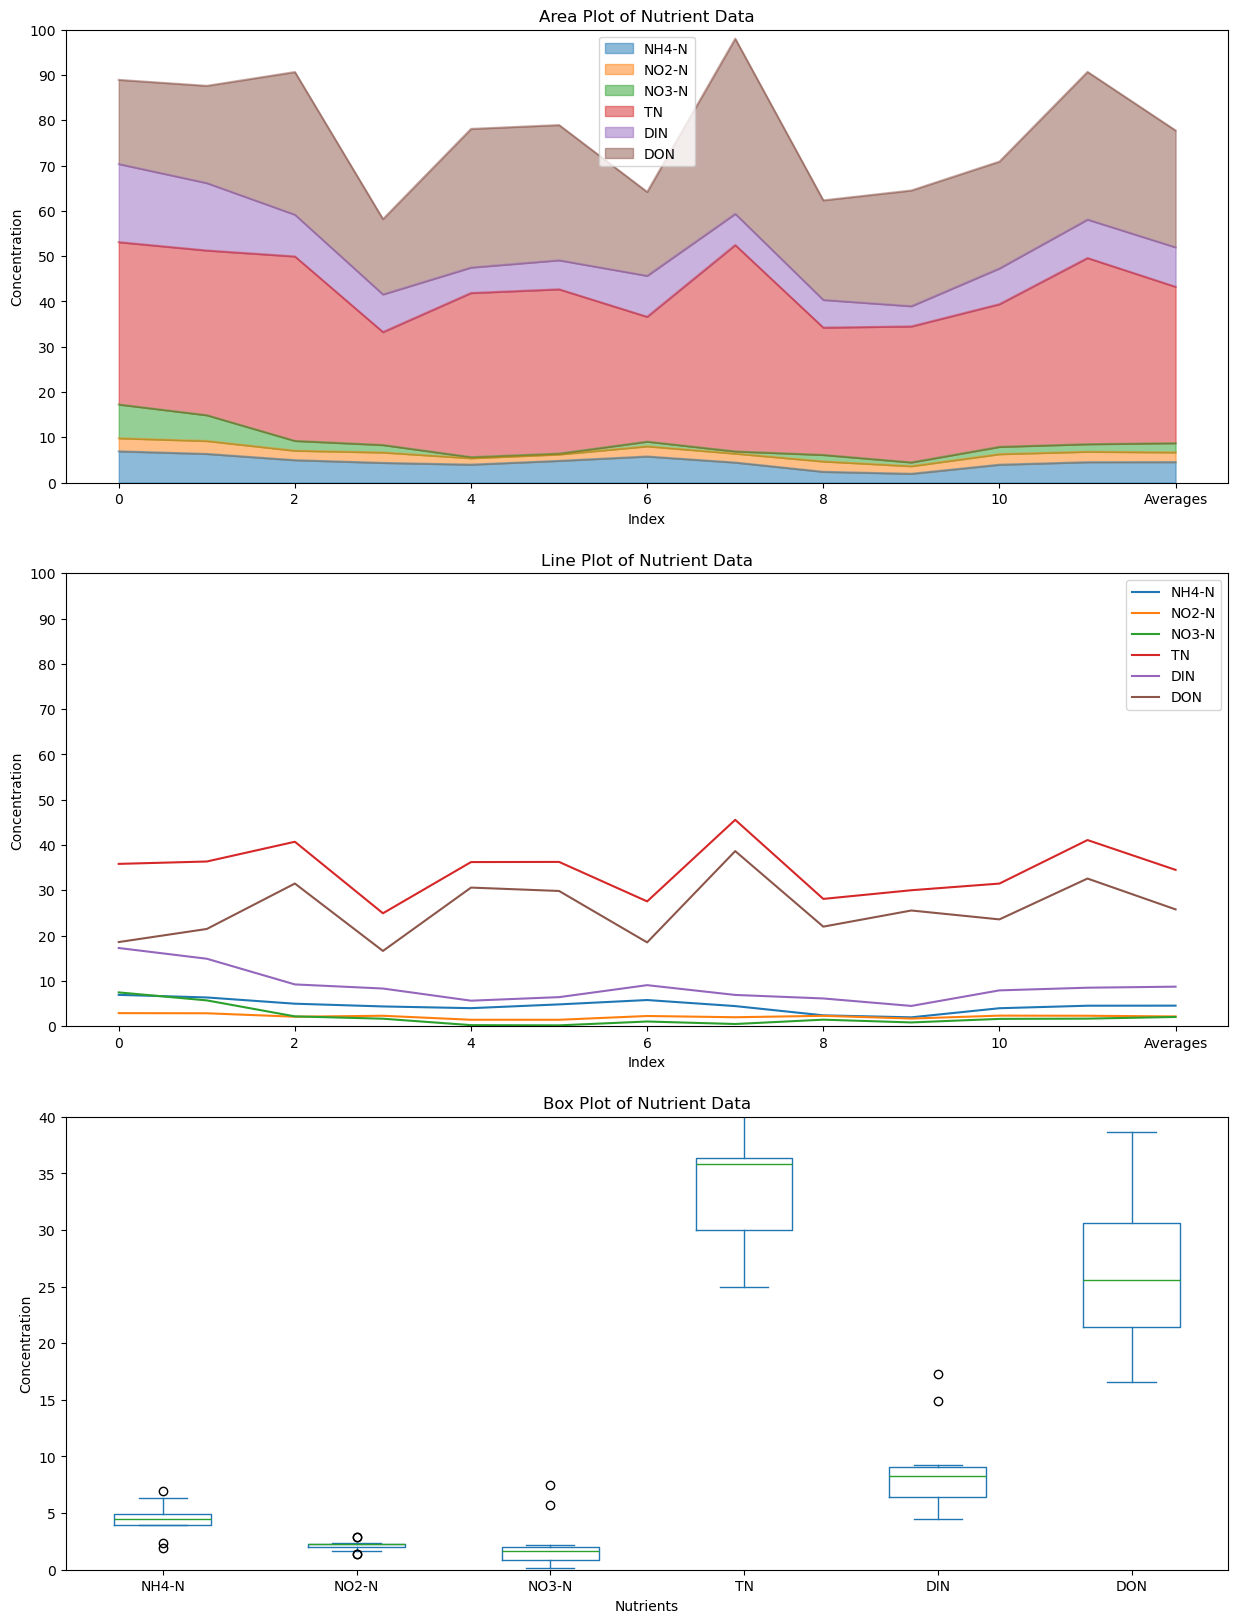

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(15,20))
# Area Plot  
df.drop(columns='Day Count').plot(kind='area', ax=axs[0], alpha=0.5)  
axs[0].set_title("Area Plot of Nutrient Data")  
axs[0].set_ylabel("Concentration")  
axs[0].set_xlabel("Index") 
axs[0].set_ylim(0, 100)
axs[0].yaxis.set_ticks(np.arange(0, 101, 10))

# Line Plot  
df.drop(columns='Day Count').plot(kind='line', ax=axs[1])  
axs[1].set_title("Line Plot of Nutrient Data")  
axs[1].set_ylabel("Concentration")  
axs[1].set_xlabel("Index")  
axs[1].legend(loc='best')  
axs[1].set_ylim(0, 100)  
axs[1].yaxis.set_ticks(np.arange(0, 101, 10))  

# Box Plot  
df.drop(columns='Day Count').plot(kind='box', ax=axs[2])  
axs[2].set_title("Box Plot of Nutrient Data")  
axs[2].set_ylabel("Concentration")  
axs[2].set_xlabel("Nutrients")  
axs[2].set_ylim(0, 40)
plt.subplots_adjust(hspace=0.2)
plt.show()   

### Compare the NH4-N vs DIN composition graphically using a scatter plot.

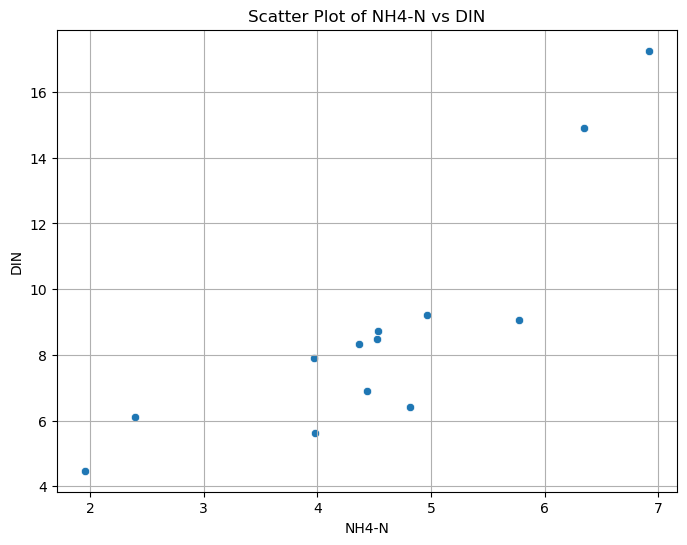

In [40]:
plt.figure(figsize=(8, 6))  
sns.scatterplot(data=df, x='NH4-N', y='DIN')  
plt.title('Scatter Plot of NH4-N vs DIN')  
plt.xlabel('NH4-N')  
plt.ylabel('DIN')  
plt.grid(True)  
plt.show()  

### Q2) Read the data file PhytoBiomass.xlsx into a DataFrame and perform the following tasks:

In [41]:
df2=pd.read_excel(pytho_biomass_url)
df2

,Days,Cyanophyceans,Chlorophyceae,Total Biomass
0,1,0.554035,0.340955,4.775824
1,47,0.409126,0.446749,4.536462
2,78,0.606581,0.210896,4.131376
3,116,0.308334,1.301525,3.597625
4,143,0.828900,0.352965,2.867716
5,181,0.822262,1.327444,3.179547
6,210,3.303263,1.168384,7.895237
7,236,35.462698,0.739803,40.195265
8,270,3.882161,0.537869,9.079613
9,298,0.575795,0.399925,3.351554


### Find the null values, if any, in the data set and fill these null values with the method of your choice.

In [42]:
df2.fillna(df2.mean(), inplace=True)
df2

,Days,Cyanophyceans,Chlorophyceae,Total Biomass
0,1,0.554035,0.340955,4.775824
1,47,0.409126,0.446749,4.536462
2,78,0.606581,0.210896,4.131376
3,116,0.308334,1.301525,3.597625
4,143,0.828900,0.352965,2.867716
5,181,0.822262,1.327444,3.179547
6,210,3.303263,1.168384,7.895237
7,236,35.462698,0.739803,40.195265
8,270,3.882161,0.537869,9.079613
9,298,0.575795,0.399925,3.351554


### Add a column Others which list the biomass of other phytoplankton groups obtained by subtracting TotalBiomass with the sum of the biomass of Cyanophycean and Chlorophyceae

In [43]:
df2['Others'] = df2['Total Biomass '] - (df2['Cyanophyceans'] + df2['Chlorophyceae'])
df2

,Days,Cyanophyceans,Chlorophyceae,Total Biomass,Others
0,1,0.554035,0.340955,4.775824,3.880834
1,47,0.409126,0.446749,4.536462,3.680587
2,78,0.606581,0.210896,4.131376,3.313899
3,116,0.308334,1.301525,3.597625,1.987766
4,143,0.828900,0.352965,2.867716,1.685852
5,181,0.822262,1.327444,3.179547,1.029841
6,210,3.303263,1.168384,7.895237,3.423590
7,236,35.462698,0.739803,40.195265,3.992764
8,270,3.882161,0.537869,9.079613,4.659583
9,298,0.575795,0.399925,3.351554,2.375834


### Describe the characteristics of the DataFrame.

In [44]:
df2.describe() 

,Days,Cyanophyceans,Chlorophyceae,Total Biomass,Others
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,189.666667,4.096431,0.707822,8.597235,3.792982
std,115.797106,9.944160,0.443034,10.307117,2.191045
min,1.000000,0.308334,0.210896,2.867716,1.029841
25%,106.500000,0.570355,0.350853,3.536107,2.278817
50%,195.500000,0.825581,0.492309,4.656143,3.552089
75%,277.000000,1.782892,1.201670,9.084406,4.159469
max,364.000000,35.462698,1.327444,40.195265,8.985380


### Plot the biomass composition of each group using a barh and kde plot

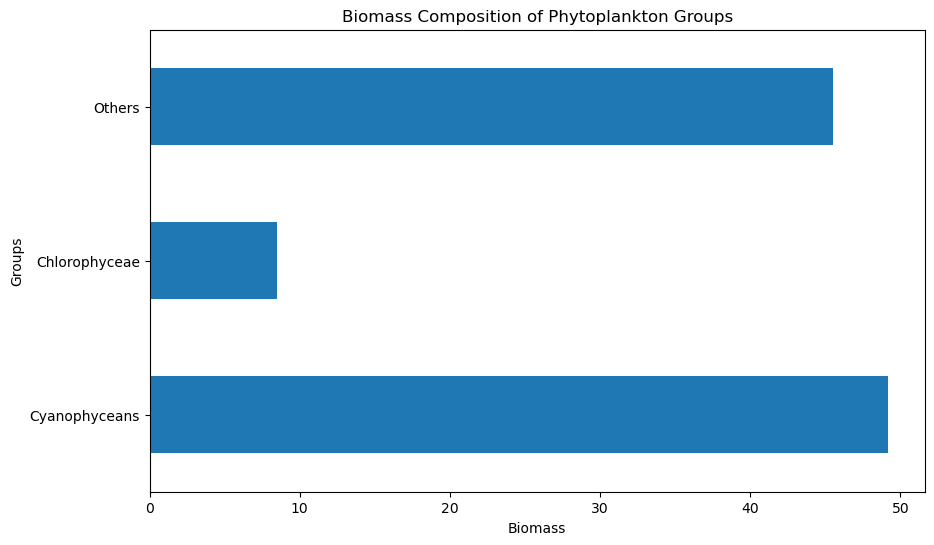

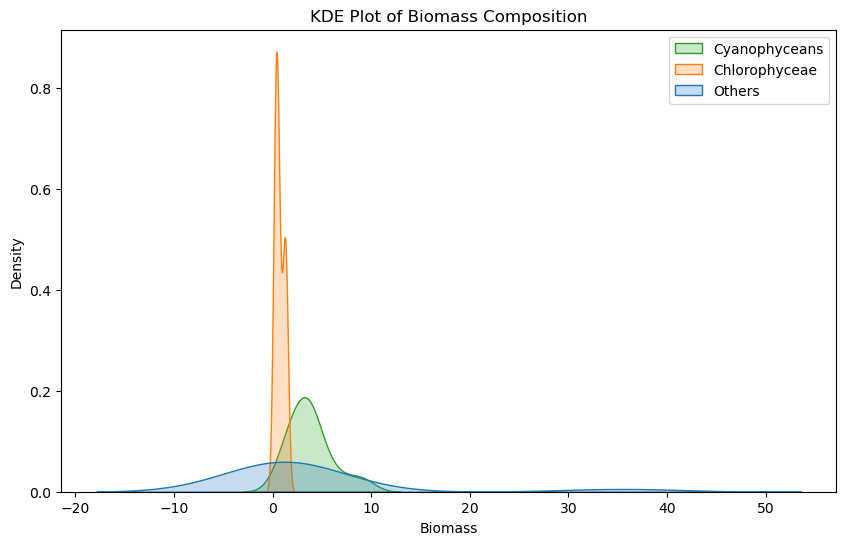

In [45]:
plt.figure(figsize=(10, 6))  
df2[['Cyanophyceans', 'Chlorophyceae', 'Others']].sum().plot(kind='barh')  
plt.title('Biomass Composition of Phytoplankton Groups')  
plt.xlabel('Biomass')  
plt.ylabel('Groups')  
plt.figure(figsize=(10, 6))  
sns.kdeplot(data=df2[['Cyanophyceans', 'Chlorophyceae', 'Others']], fill=True, common_norm=False)  
plt.title('KDE Plot of Biomass Composition')  
plt.xlabel('Biomass')  
plt.ylabel('Density')  
plt.legend(['Cyanophyceans', 'Chlorophyceae', 'Others'])  
plt.show()  